In [1]:
from collections import Counter
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('../data/final_data.csv')

In [3]:
df.isna().sum() / len(df) * 100

short_descriptions    1.620004
assignment_groups     1.614584
dtype: float64

In [4]:
df.dropna(inplace=True)

In [5]:
df.tail()

,short_descriptions,assignment_groups
166044,Data files per our call,PZC-FJ-ServiceDesk
166045,Approver Matrix,PZC-FJ-ServiceDesk
166046,a new Product Hierarchy Level 5 and 6: Vegeta...,PZC-FJ-ServiceDesk
166047,[SAP] Create SAP account in PROD for Charala...,PZC-FJ-ServiceDesk
166048,APO Daily and Monthly Chains to be triggere...,PZC-FJ-ServiceDesk


In [6]:
X, y = df['short_descriptions'], df['assignment_groups']

In [7]:
cnt_asgn_grps = df['assignment_groups'].value_counts()

<AxesSubplot:>

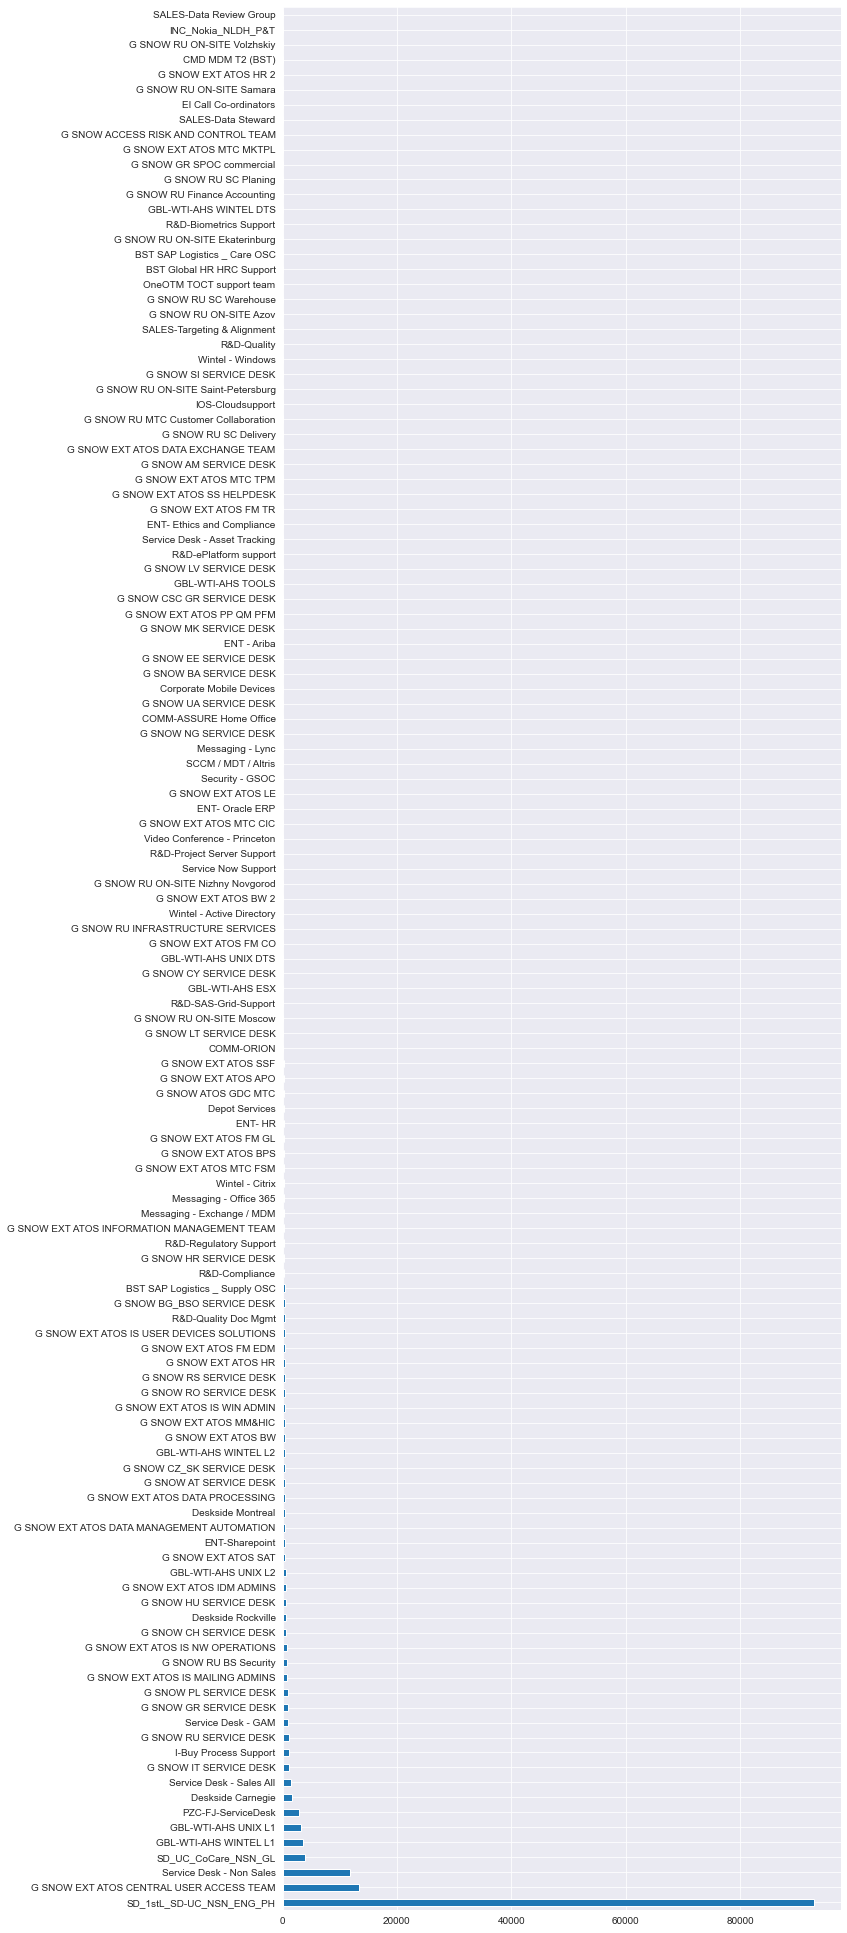

In [8]:
cnt_asgn_grps[:127].plot(kind='barh', figsize=(10, 35))

In [15]:
wanted = cnt_asgn_grps[cnt_asgn_grps > 10]

In [21]:
new_df = df[df['assignment_groups'].isin(wanted.index.to_list())]

In [22]:
X, y = new_df['short_descriptions'], new_df['assignment_groups']

In [23]:
from imblearn.over_sampling import SMOTE

In [24]:
over_sampler = SMOTE()

In [25]:
vectorizer = joblib.load('../models/vectorizer')
encoder = joblib.load('../models/encoder')

In [26]:
X_vec = vectorizer.transform(X)
y_enc = encoder.transform(y)

In [27]:
X, y = over_sampler.fit_resample(X_vec, y_enc)

In [29]:
X = vectorizer.inverse_transform(X)
y = encoder.inverse_transform(y)

In [32]:
len(X), len(y)

(14866400, 14866400)

In [33]:
res_df = pd.DataFrame(
    {
        'short_descriptions': X,
        'assignment_groups': y
    }
)

In [34]:
res_df.shape

(14866400, 2)

In [35]:
res_df.tail()

,short_descriptions,assignment_groups
14866395,"[access, for, need, ngit, reporting]",grp_Atos_NGIT_Reporting
14866396,[for],grp_Atos_NGIT_Reporting
14866397,[reporting],grp_Atos_NGIT_Reporting
14866398,"[app, ngit, reporting]",grp_Atos_NGIT_Reporting
14866399,[],grp_Atos_NGIT_Reporting


In [37]:
res_df['assignment_groups'].value_counts()

R&D-Regulatory Support                92915
SCCM / MDT / Altris                   92915
ENT- HR                               92915
Security - GSOC                       92915
G SNOW EE SERVICE DESK                92915
                                      ...  
PZC-FJ-ServiceDesk                    92915
G SNOW GR SERVICE DESK                92915
SALES-Data Review Group               92915
G SNOW EXT ATOS DATA EXCHANGE TEAM    92915
GBL-WTI-AHS ESX                       92915
Name: assignment_groups, Length: 160, dtype: int64

In [39]:
res_df.to_csv('../data/balanced_data.csv', index=False)